In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [23]:
df=pd.read_csv('rq1_cleaned.csv')

In [24]:
df.columns
df=df.drop(['EQ5D_Round3', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round2'].notnull()]  # for example


In [32]:
full = df_linear.copy()

In [37]:
X=full.drop(['EQ5D_Round2','SID'], axis=1)
y=full['EQ5D_Round2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [63]:
## Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

features = coef_df['Feature'].values


Test MSE: 0.041
Test R²: 0.451
                    Feature  Coefficient
0               EQ5D_Round1     0.152212
3                occupation     0.023594
36        diag_Chronic pain    -0.019369
1                       Age    -0.015098
39        diag_Fibromyalgia    -0.015054
40  diag_Multiple sclerosis    -0.013968
10                 Dementia     0.009437
69                form_Flos     0.008843
27                      VTE    -0.008262
41    diag_Neuropathic pain    -0.007872


In [73]:
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


Test MSE: 0.041
Test R²: 0.451
                    Feature  Coefficient
0               EQ5D_Round1     0.152201
3                occupation     0.023595
36        diag_Chronic pain    -0.019366
1                       Age    -0.015096
39        diag_Fibromyalgia    -0.015052
40  diag_Multiple sclerosis    -0.013966
10                 Dementia     0.009434
69                form_Flos     0.008842
27                      VTE    -0.008261
41    diag_Neuropathic pain    -0.007870


In [74]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

print(f"Test MSE: {mse}")

Test MSE: 0.041
Test R²: 0.452
                    Feature  Coefficient
0               EQ5D_Round1     0.153279
3                occupation     0.022603
36        diag_Chronic pain    -0.016868
1                       Age    -0.014720
39        diag_Fibromyalgia    -0.013564
40  diag_Multiple sclerosis    -0.012079
69                form_Flos     0.009039
27                      VTE    -0.007326
41    diag_Neuropathic pain    -0.006216
10                 Dementia     0.006121
Test MSE: 0.041102582810766355


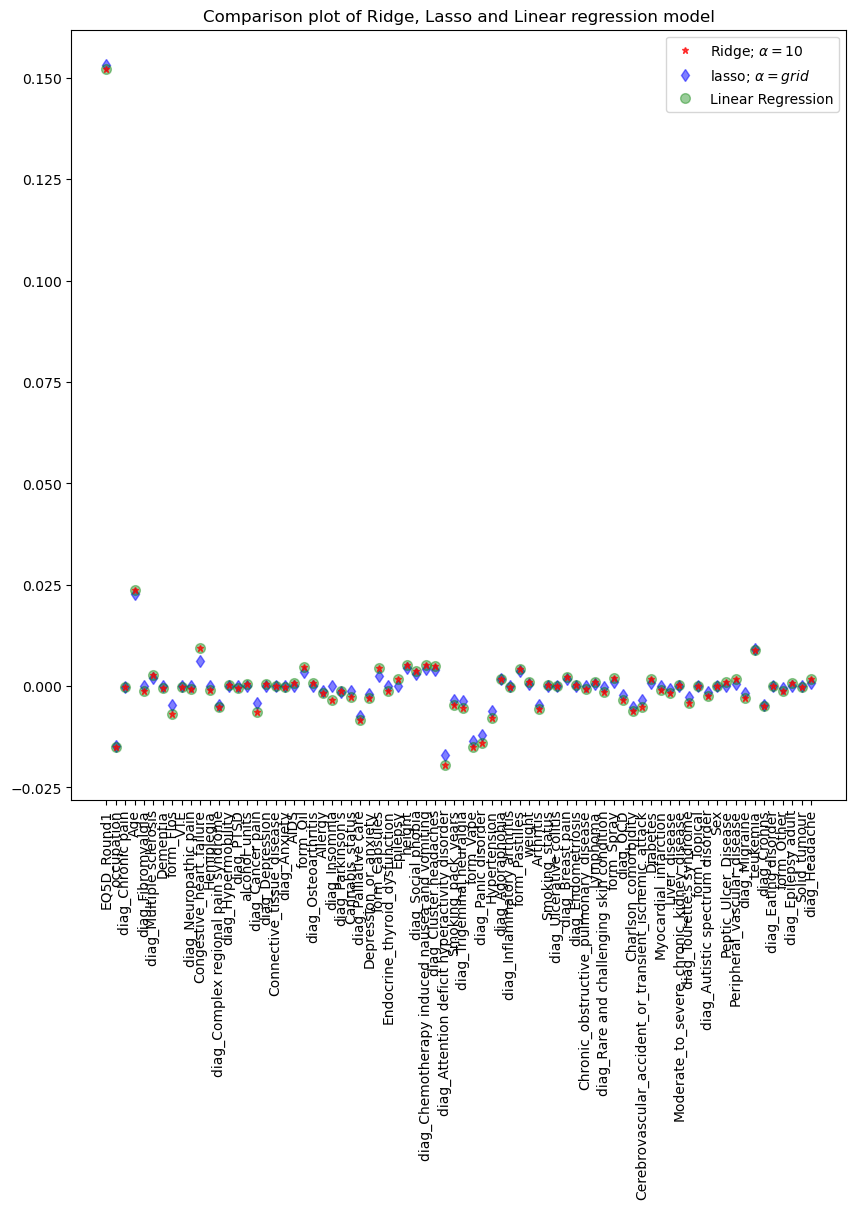

In [75]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()
